# Proyek Machine Learning Terapan **"Recommendation System"** : **Content-based Filtering** & **Collaborative Filtering** Book Recommendation 

---


- **Nama:** [Satriatama Putra]
- **Email:** [satsatria14@gmail.com]
- **ID Dicoding:** [sshaiton]

## Import Semua Library yang digunakan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## 1. Data Loading

Dataset yang digunakan pada proyek ini didapatkan dari Kaggle beranama [Book-Crossing: User review ratings](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset). 

In [3]:
df = pd.read_csv('preprocessed_data.csv')

## 2. Data Understanding

### 2.1 Menampilkan Dataset

In [4]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


### 2.2 Exploratory Data Analysis

#### 2.2.1 Deskripsi Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

**Insight:**
- Dataset memiliki 1,031,175 entri dengan 19 kolom yang berisi informasi tentang pengguna, buku, dan rating
- Sebagian besar kolom memiliki data lengkap.
- Terdapat 14 kolom bertipe object (string), 3 kolom integer (Unnamed: 0, user_id, rating), dan 2 kolom float (age, year_of_publication)
- Dataset menyimpan informasi pengguna (user_id, location, age), detail buku (isbn, book_title, book_author, year_of_publication, publisher), metadata buku (Summary, Language, Category), serta tiga ukuran gambar sampul buku (img_s, img_m, img_l)
- Lokasi pengguna dipecah menjadi tiga komponen: city, state, dan country

#### 2.2.2 Deskripsi Statistik

In [6]:
df.describe()

,Unnamed: 0,user_id,age,rating,year_of_publication
count,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06
mean,5.155870e+05,1.405944e+05,3.642902e+01,2.839022e+00,1.995283e+03
std,2.976747e+05,8.052444e+04,1.035354e+01,3.854149e+00,7.309340e+00
min,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,1.376000e+03
25%,2.577935e+05,7.041500e+04,3.100000e+01,0.000000e+00,1.992000e+03
50%,5.155870e+05,1.412100e+05,3.474390e+01,0.000000e+00,1.997000e+03
75%,7.733805e+05,2.114260e+05,4.100000e+01,7.000000e+00,2.001000e+03
max,1.031174e+06,2.788540e+05,9.900000e+01,1.000000e+01,2.008000e+03


In [7]:
df.describe(include='object')

,location,isbn,book_title,book_author,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
count,1031175,1031175,1031175,1031174,1031175,1031175,1031175,1031175,1031175,1031175,1031175,1017072,1008377,995801
unique,22480,270170,241090,101593,16729,269861,269861,269861,136911,33,6448,14767,2123,414
top,"toronto, ontario, canada",0971880107,Wild Animus,Stephen King,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,9,en,9,toronto,california,usa
freq,14782,2502,2502,10053,34724,2502,2502,2502,398937,618505,406102,15124,106777,745840


**Insight:**

- **Variabel Numerik:**
  - Dataset memiliki rating pengguna dengan skala 0-10, dengan rata-rata 2.84. Menariknya, median rating adalah 0, menunjukkan bahwa banyak buku belum diberi rating atau terdapat bias ke arah nilai rendah
  - Usia pengguna berkisar antara 5-99 tahun, dengan rata-rata sekitar 36.4 tahun, menunjukkan distribusi pengguna dari berbagai kelompok umur
  - Tahun publikasi buku berkisar dari 1376 hingga 2008, dengan mayoritas buku (IQR) diterbitkan antara tahun 1992-2001, menandakan koleksi yang mencakup berbagai era

- **Variabel Kategorikal:**
  - Dataset memiliki keragaman tinggi dengan 270,170 ISBN unik, 241,090 judul buku unik, dan 101,593 penulis unik
  - Stephen King adalah penulis yang paling banyak muncul dengan 10,053 entri, menunjukkan popularitasnya dalam dataset
  - "Wild Animus" adalah judul buku yang paling sering muncul (2,502 kali)
  - Ballantine Books merupakan penerbit paling umum dengan 34,724 entri
  - Mayoritas konten dalam bahasa Inggris (618,505 entri)
  - Distribusi geografis pengguna terkonsentrasi di USA (745,840 entri), dengan Toronto sebagai kota terbanyak (15,124) dan California sebagai negara bagian terbanyak (106,777)
  - Terdapat anomali pada kolom Summary dan dan Category. Dimana terdapat '9' Menjadi data yang paling banyak muncul.

Memerisa anomali pada kolom Category dan Summary

In [8]:
category_counts = df['Category'].value_counts()
print(f"Jumlah nilai unik: {len(category_counts)}")
print("\nDistribusi kategori:")
print(category_counts.head(10))

num_category_9 = df[df['Category'] == '9'].shape[0]
total_books = df.shape[0]
percentage = (num_category_9 / total_books) * 100
print(f"\nBuku dengan kategori '9': {num_category_9} dari {total_books} ({percentage:.2f}%)")

summary_counts = df['Summary'].value_counts()
print(f"Jumlah nilai unik: {len(category_counts)}")
print("\nDistribusi summary:")
print(summary_counts.head(10))

num_category_9 = df[df['Summary'] == '9'].shape[0]
total_books = df.shape[0]
percentage = (num_category_9 / total_books) * 100
print(f"\nBuku dengan Summary '9': {num_category_9} dari {total_books} ({percentage:.2f}%)")

Jumlah nilai unik: 6448

Distribusi kategori:
Category
9                                406102
['Fiction']                      385135
['Juvenile Fiction']              39617
['Biography & Autobiography']     22390
['Humor']                          8500
['History']                        8249
['Religion']                       7291
['Juvenile Nonfiction']            5473
['Social Science']                 5264
['Body, Mind & Spirit']            4541
Name: count, dtype: int64

Buku dengan kategori '9': 406102 dari 1031175 (39.38%)
Jumlah nilai unik: 6448

Distribusi summary:
Summary
9                                                                                                                                                                                                                                                          398937
Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point.                                           

#### 2.2.3 Mengecek Missing Value dan Duplikasi Data

Mengecek missing value

In [9]:
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                35374
dtype: int64


Terdapat missing value pada beberapa kolom, yaitu: 
- book_author(1)
- city(14103) 
- state(22798) 
- country(35374)

Mengecek duplikasi data

In [10]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Tidak terdapat duplikasi data pada dataset.

#### 2.2.4 Univariate Analysis

Distribusi Rating

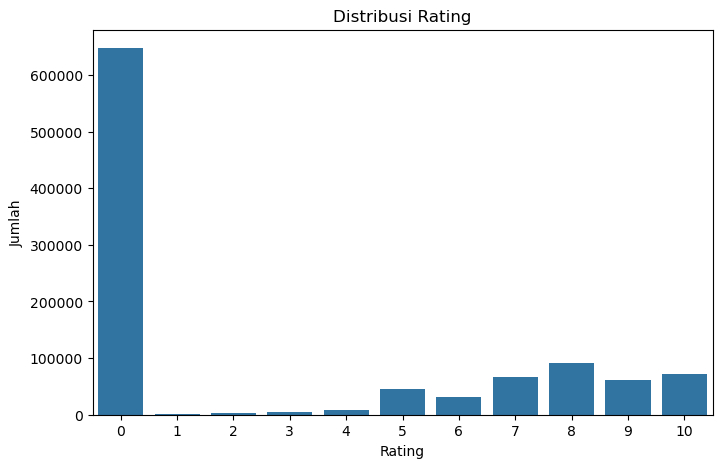

Rata-rata rating: 2.8390215045942737
Median rating: 0.0


In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

print("Rata-rata rating:", df['rating'].mean())
print("Median rating:", df['rating'].median())

Distribusi Umur

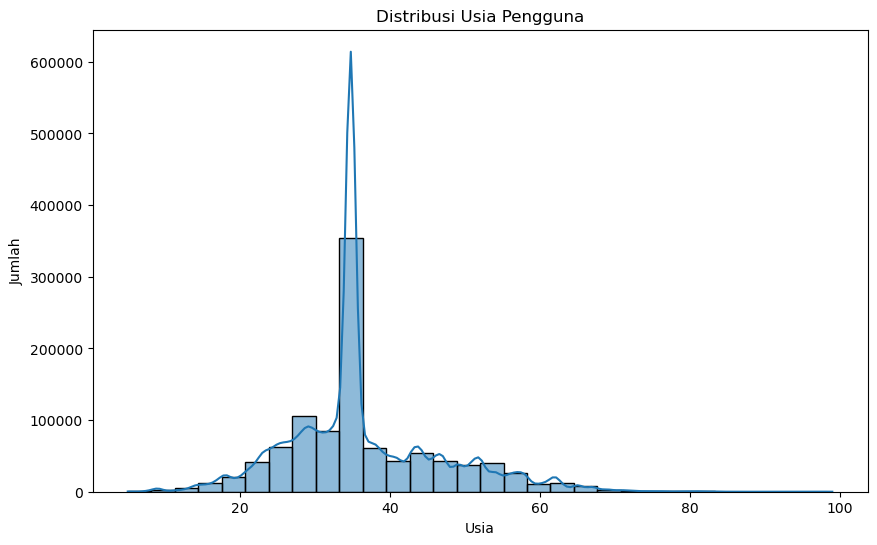

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

Distribusi Tahun Publikasi

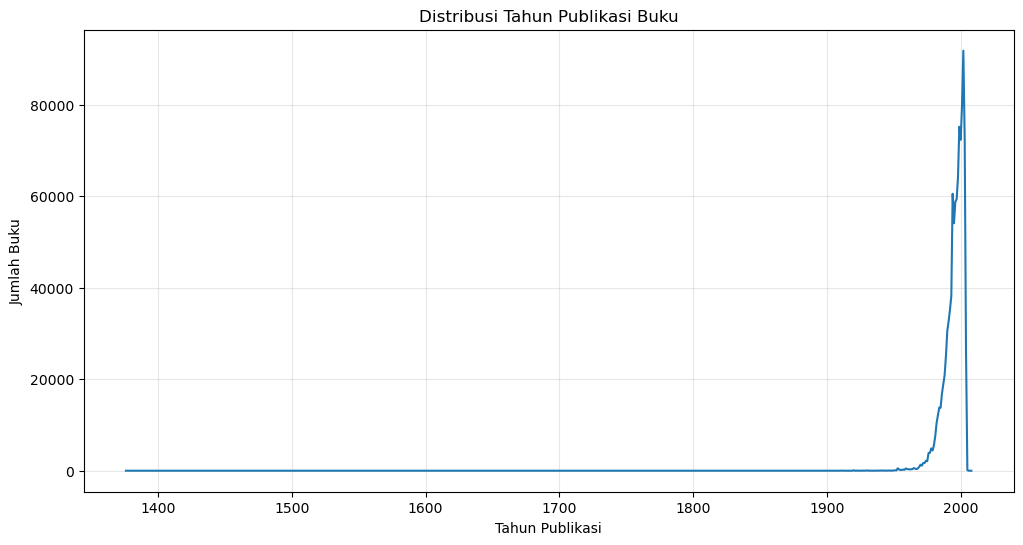

In [13]:
plt.figure(figsize=(12, 6))
df['year_of_publication'].value_counts().sort_index().plot(kind='line')
plt.title('Distribusi Tahun Publikasi Buku')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.grid(True, alpha=0.3)
plt.show()

Distribusi Penulis Top 10

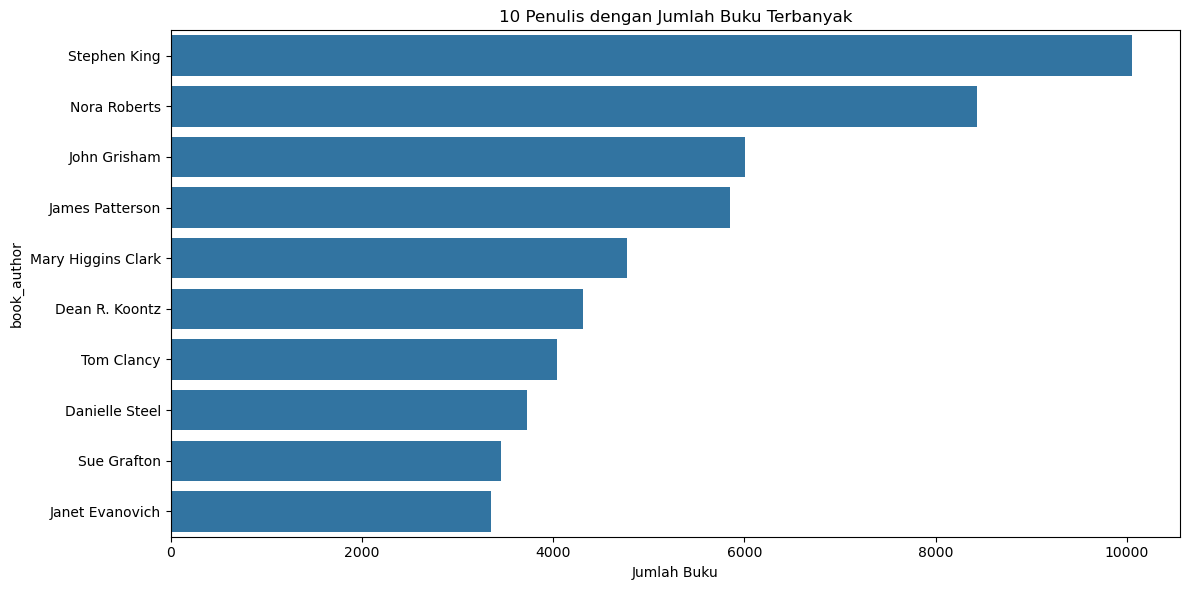

In [14]:
plt.figure(figsize=(12, 6))
top_authors = df['book_author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('10 Penulis dengan Jumlah Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.tight_layout()
plt.show()

Distribusi Bahasa

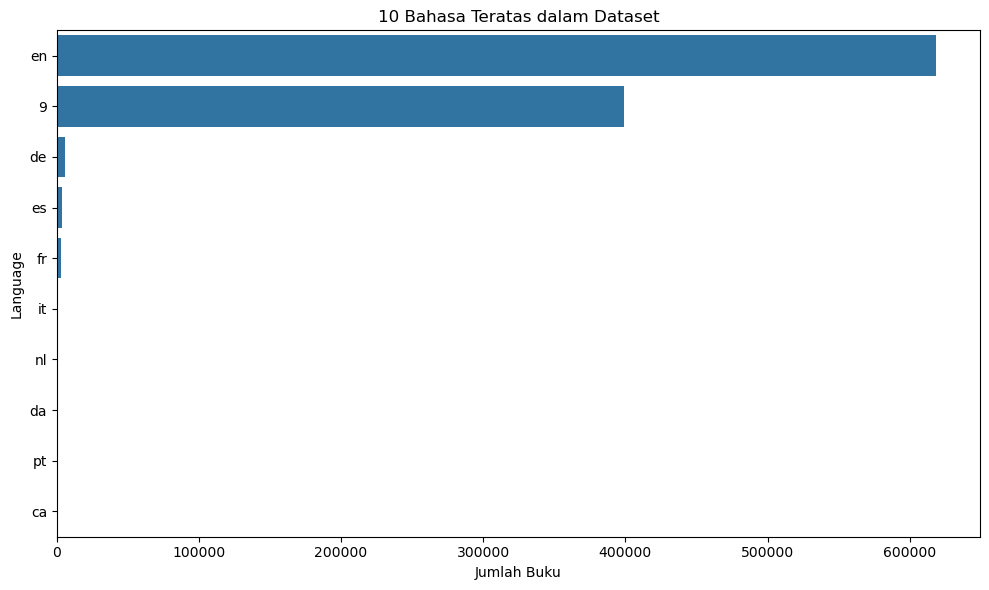

In [15]:
plt.figure(figsize=(10, 6))
language_counts = df['Language'].value_counts().head(10)
sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('10 Bahasa Teratas dalam Dataset')
plt.xlabel('Jumlah Buku')
plt.tight_layout()
plt.show()

Distribusi 10 Negara dengan Jumlah Pengguna Terbanyak

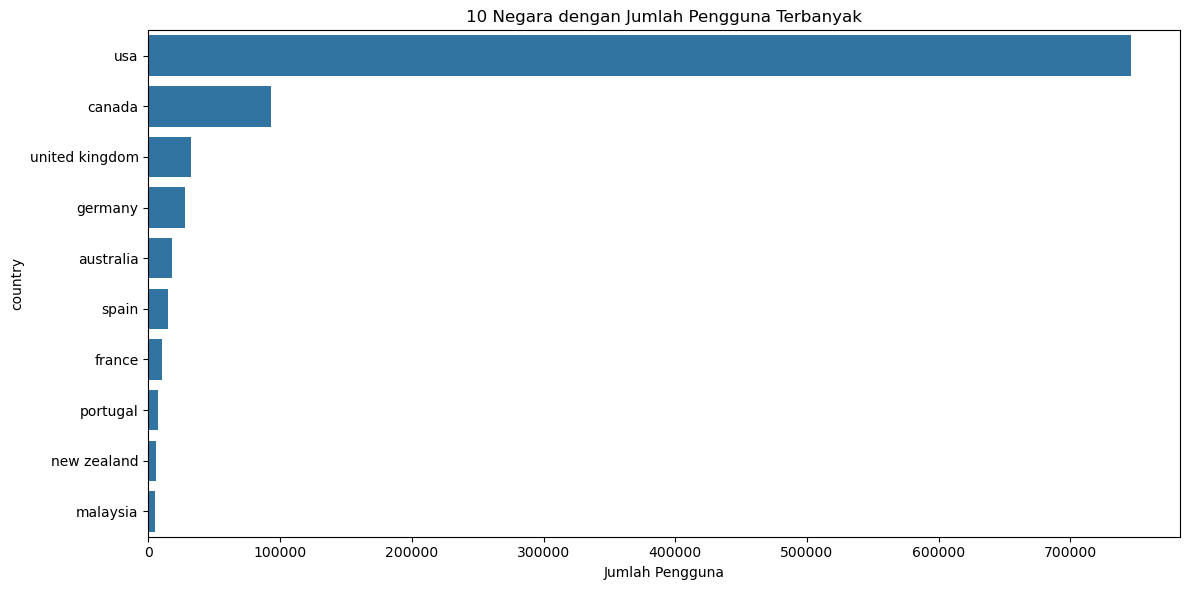

In [16]:
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('10 Negara dengan Jumlah Pengguna Terbanyak')
plt.xlabel('Jumlah Pengguna')
plt.tight_layout()
plt.show()

- **Distribusi Rating** menunjukkan dominasi nilai 0, mengindikasikan mayoritas entri dalam dataset adalah interaksi tanpa rating eksplisit (implicit feedback), yang akan berpengaruh signifikan pada pemodelan sistem rekomendasi.

- **Distribusi Usia Pengguna** memperlihatkan rentang luas (5-99 tahun) dengan konsentrasi terbesar pada kelompok usia 30-40 tahun, mencerminkan basis pengguna dewasa sebagai segmen utama pembaca.

- **Distribusi Tahun Publikasi** menunjukkan peningkatan drastis dari tahun 1990-an hingga awal 2000-an, dengan puncak di sekitar tahun 2000, mengindikasikan konsentrasi dataset pada literatur kontemporer.

- **Distribusi Penulis** menunjukkan Stephen King sebagai penulis dengan representasi tertinggi (10,053 entri), jauh melampaui penulis lainnya, menandakan popularitasnya yang signifikan dalam dataset.

- **Distribusi Bahasa** sangat didominasi oleh bahasa Inggris (618,505 entri), menunjukkan ketidakseimbangan yang ekstrem dalam keragaman bahasa dan berpotensi membatasi keefektifan rekomendasi untuk konten non-Inggris.

- **Distribusi Geografis** menunjukkan dominasi USA (745,840 entri) yang sangat signifikan, dengan Toronto sebagai kota individual dengan representasi tertinggi, mencerminkan bias geografis yang kuat dalam dataset.

#### 2.2.5 Mulitivariate Analysis

Distribusi Rating Berdasarkan Tahun Publikasi

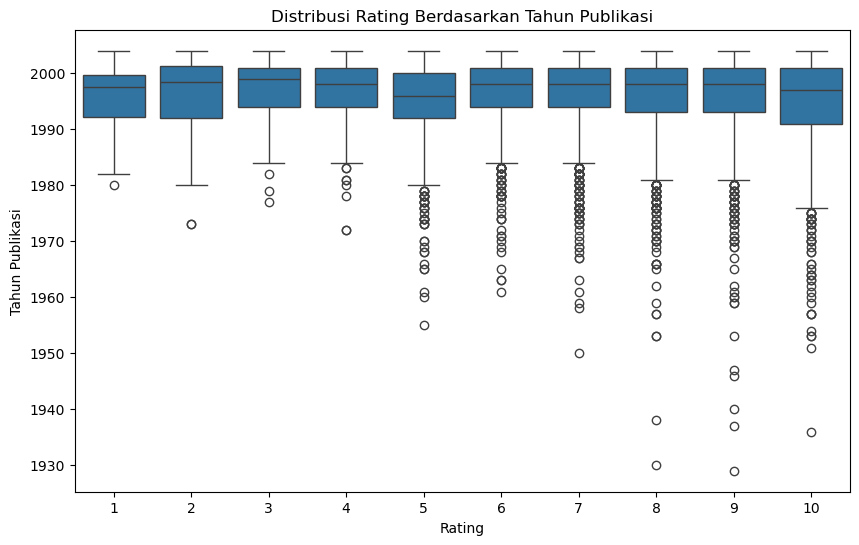

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='year_of_publication', data=df[df['rating'] > 0].sample(10000))
plt.title('Distribusi Rating Berdasarkan Tahun Publikasi')
plt.xlabel('Rating')
plt.ylabel('Tahun Publikasi')
plt.show()

Rata-rata Rating oleh 10 Penerbit Teratas (min. 1000 rating)

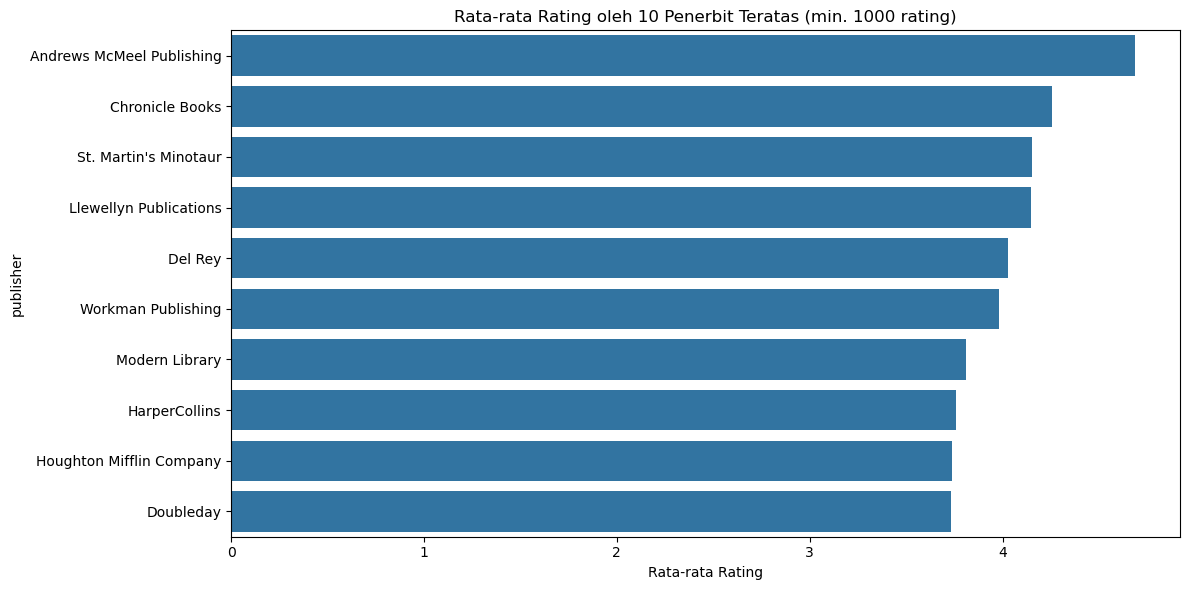

In [18]:
plt.figure(figsize=(12, 6))
publisher_ratings = df.groupby('publisher')['rating'].agg(['mean', 'count'])
publisher_ratings = publisher_ratings[publisher_ratings['count'] > 1000].sort_values('mean', ascending=False).head(10)
sns.barplot(x=publisher_ratings['mean'].values, y=publisher_ratings.index)
plt.title('Rata-rata Rating oleh 10 Penerbit Teratas (min. 1000 rating)')
plt.xlabel('Rata-rata Rating')
plt.tight_layout()
plt.show()

Distribusi Rating oleh 10 Penulis Teratas

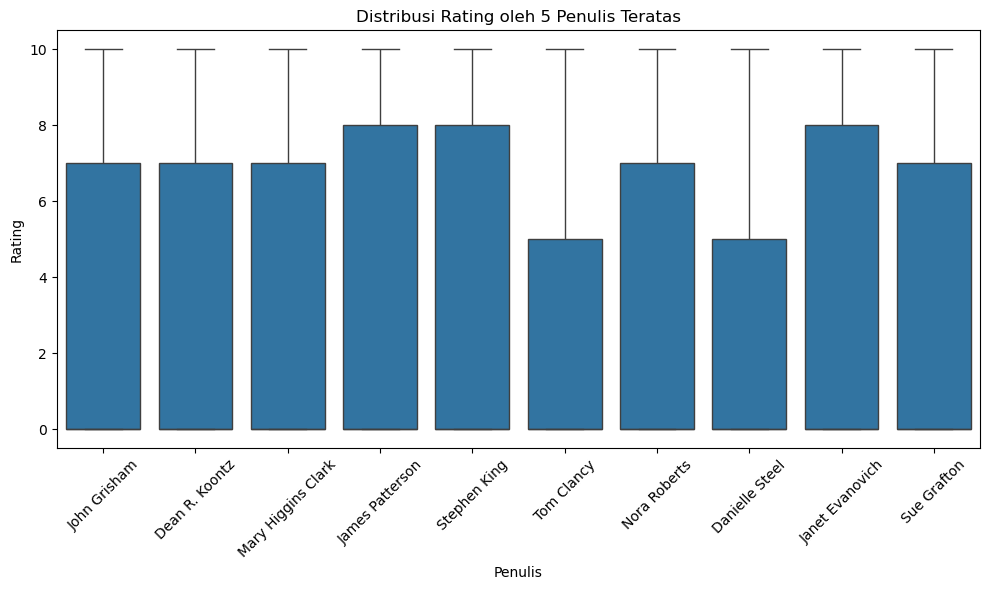

In [19]:
plt.figure(figsize=(10, 6))
top_authors = df['book_author'].value_counts().head(10).index
author_data = df[df['book_author'].isin(top_authors)]
sns.boxplot(x='book_author', y='rating', data=author_data)
plt.title('Distribusi Rating oleh 5 Penulis Teratas')
plt.xlabel('Penulis')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Rating berdasarkan Tahun Publikasi** menunjukkan distribusi rating yang relatif konsisten antar tahun, menandakan bahwa usia buku tidak secara signifikan mempengaruhi penilaian pengguna terhadap kualitas konten.

- **Rating berdasarkan Penerbit** mengungkapkan variasi signifikan antar penerbit besar, dengan beberapa penerbit secara konsisten mendapatkan rating lebih tinggi, memberikan signal potensial untuk filtering konten berkualitas.

- **Rating berdasarkan Penulis Teratas** menunjukkan bahwa penulis populer seperti Stephen King memiliki distribusi rating yang lebih luas dengan median yang lebih rendah, mengindikasikan bahwa popularitas tidak selalu berkorelasi dengan rating tinggi.

- Terdapat perbedaan pola rating berdasarkan publisher, di mana beberapa penerbit niche menunjukkan rata-rata rating lebih tinggi dibandingkan penerbit mainstream dengan volume tinggi, menunjukkan trade-off antara popularitas dan persepsi kualitas.

#### 2.2.6 Correlation Matrix

Korelasi numerikal

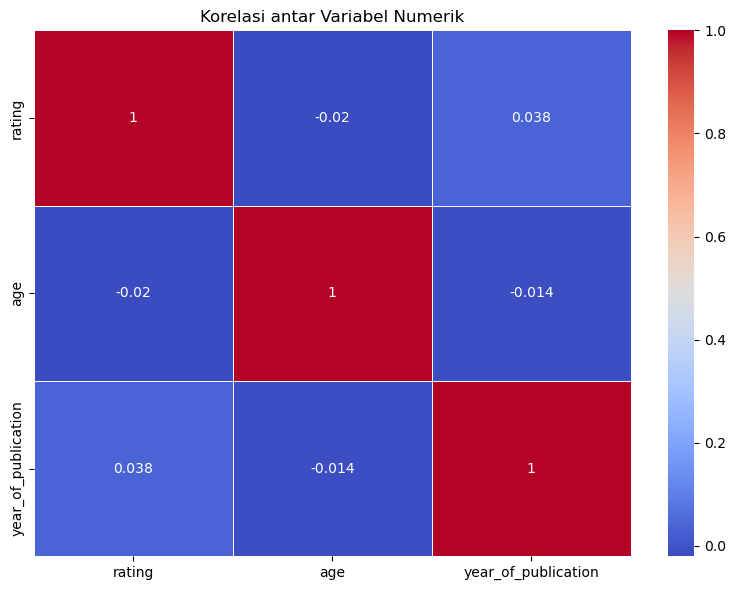

In [20]:
plt.figure(figsize=(8, 6))
numeric_df = df[['rating', 'age', 'year_of_publication']].dropna()
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()


- Korelasi antara rating dan usia pengguna sangat lemah, menandakan bahwa preferensi literatur tidak secara signifikan dipengaruhi oleh faktor usia pengguna.

- Korelasi antara rating dan tahun publikasi juga sangat lemah, mengkonfirmasi insight dari analisis multivariate bahwa usia buku tidak menjadi faktor penentu dalam penilaian pengguna.

- Korelasi lemah antara usia pengguna dan tahun publikasi mengindikasikan tidak adanya kecenderungan kuat dari kelompok usia tertentu untuk membaca buku dari era tertentu.

- Secara keseluruhan, matrix korelasi menunjukkan independensi antar variabel numerik utama, mengisyaratkan bahwa pendekatan content-based dan collaborative filtering perlu memanfaatkan fitur kategorikal dan relasional untuk menghasilkan rekomendasi yang efektif.

## 3. Data Preparation

Pada tahap ini, akan dilakukan persiapan data untuk digunakan dalam pemodelan sistem rekomendasi buku menggunakan pendekatan content-based filtering dan collaborative filtering.

### 3.1 Menangani Missing Value dan Duplikasi Data



In [21]:
# Melihat kembali kolom dengan missing value
print("Kolom dengan missing value:")
print(df.isna().sum()[df.isna().sum() > 0])

# Menangani missing value pada book_author
df['book_author'] = df['book_author'].fillna('Unknown Author')

# Untuk kolom lokasi, kita dapat mengisinya dengan 'Unknown' karena tidak terlalu berpengaruh pada model rekomendasi buku
df['city'] = df['city'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Verifikasi bahwa tidak ada lagi missing value
print("\nSetelah penanganan missing value:")
print(df.isna().sum()[df.isna().sum() > 0])

# Verifikasi tidak ada duplikasi (meskipun sudah diverifikasi sebelumnya)
print(f"\nJumlah duplikasi: {df.duplicated().sum()}")

Kolom dengan missing value:
book_author        1
city           14103
state          22798
country        35374
dtype: int64

Setelah penanganan missing value:
Series([], dtype: int64)

Jumlah duplikasi: 0




### 3.2 Pemilihan dan Seleksi Fitur

Kita akan memilih fitur yang relevan untuk masing-masing pendekatan.



In [22]:
# Memilih fitur untuk content-based filtering
content_features = ['isbn', 'book_title', 'book_author', 'publisher', 'Category', 'Summary']

# Filter data untuk menghilangkan buku dengan kategori '9' dan summary '9'
filtered_content_df = df[~(df['Category'] == '9') & ~(df['Summary'] == '9')]
content_df = filtered_content_df[content_features].drop_duplicates(subset=['isbn'])

# Memilih fitur untuk collaborative filtering (tidak perlu difilter)
collab_features = ['user_id', 'isbn', 'rating']
collab_df = df[collab_features]

# Melihat hasil pemilihan fitur
print("Dataset untuk content-based filtering (setelah menghilangkan anomali):")
print(content_df.head())
print(f"Jumlah buku unik: {content_df.shape[0]}")
print(f"Persentase data yang dipertahankan: {content_df.shape[0]/df['isbn'].nunique()*100:.2f}%")

# Melihat distribusi kategori setelah filtering
print("\nDistribusi kategori setelah filtering:")
category_counts = content_df['Category'].value_counts().head(10)
print(category_counts)

print("\nDataset untuk collaborative filtering:")
print(collab_df.head())
print(f"Jumlah interaksi user-item: {collab_df.shape[0]}")

Dataset untuk content-based filtering (setelah menghilangkan anomali):
          isbn                                         book_title  \
0   0195153448                                Classical Mythology   
1   0002005018                                       Clara Callan   
15  0060973129                               Decision in Normandy   
18  0374157065  Flu: The Story of the Great Influenza Pandemic...   
29  0393045218                             The Mummies of Urumchi   

             book_author                publisher            Category  \
0     Mark P. O. Morford  Oxford University Press  ['Social Science']   
1   Richard Bruce Wright    HarperFlamingo Canada       ['Actresses']   
15          Carlo D'Este          HarperPerennial       ['1940-1949']   
18      Gina Bari Kolata     Farrar Straus Giroux         ['Medical']   
29       E. J. W. Barber   W. W. Norton & Company          ['Design']   

                                              Summary  
0   Provides an int



### 3.3 Pembersihan Data untuk Content-Based Filtering



In [23]:
# Menangani nilai kosong pada fitur teks
content_df['Summary'] = content_df['Summary'].fillna('')
content_df['Category'] = content_df['Category'].fillna('')

# Membuat fitur gabungan untuk TF-IDF
content_df['content'] = content_df['book_title'] + ' ' + content_df['book_author'] + ' ' + content_df['publisher'] + ' ' + content_df['Category'] + ' ' + content_df['Summary']

# Konversi ke lowercase
content_df['content'] = content_df['content'].str.lower()

print("Contoh fitur gabungan untuk TF-IDF:")
print(content_df['content'].head())

Contoh fitur gabungan untuk TF-IDF:
0     classical mythology mark p. o. morford oxford ...
1     clara callan richard bruce wright harperflamin...
15    decision in normandy carlo d'este harperperenn...
18    flu: the story of the great influenza pandemic...
29    the mummies of urumchi e. j. w. barber w. w. n...
Name: content, dtype: object


### 3.4 Tf-idf Vectorisation

In [ ]:
# Library untuk Content-based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

content_df = content_df.reset_index(drop=True)

indices = pd.Series(content_df.index, index=content_df['isbn']).drop_duplicates()

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_df['content'])

print(f"Dimensi matriks TF-IDF: {tfidf_matrix.shape}")
print(f"Jumlah fitur/kata unik: {len(tfidf.get_feature_names_out())}")

Dimensi matriks TF-IDF: (138701, 134760)
Jumlah fitur/kata unik: 134760


Matriks TF-IDF di atas merepresentasikan setiap buku dalam dataset dalam bentuk vektor dengan dimensi yang sesuai dengan jumlah kata unik dalam corpus. Selanjutnya, kita akan menghitung kemiripan antar buku menggunakan Cosine Similarity.



### 3.5 Pembersihan Data untuk Collaborative Filtering



In [24]:
# Filter data dengan rating eksplisit (>0) untuk collaborative filtering
collab_df = collab_df[collab_df['rating'] > 0]

# Mengecek distribusi rating setelah filtering
print("Distribusi rating setelah filtering:")
print(collab_df['rating'].value_counts().sort_index())

# Melihat jumlah user dan item setelah filtering
print(f"Jumlah user: {collab_df['user_id'].nunique()}")
print(f"Jumlah buku: {collab_df['isbn'].nunique()}")
print(f"Jumlah interaksi: {collab_df.shape[0]}")

Distribusi rating setelah filtering:
rating
1      1481
2      2375
3      5118
4      7617
5     45355
6     31689
7     66404
8     91806
9     60780
10    71227
Name: count, dtype: int64
Jumlah user: 68092
Jumlah buku: 149842
Jumlah interaksi: 383852




### 3.6 Filter Data untuk Mengatasi Sparsity

Untuk collaborative filtering, kita perlu mengatasi masalah sparse matrix dengan melakukan filtering terhadap user dan item yang memiliki jumlah interaksi minimal.



In [25]:
# Menghitung jumlah rating per user dan per buku
user_counts = collab_df['user_id'].value_counts()
book_counts = collab_df['isbn'].value_counts()

# Filter user yang telah memberikan rating minimal 5 buku
min_user_ratings = 5
active_users = user_counts[user_counts >= min_user_ratings].index
filtered_df = collab_df[collab_df['user_id'].isin(active_users)]

# Filter buku yang telah mendapatkan rating minimal dari 5 user
min_book_ratings = 5
popular_books = book_counts[book_counts >= min_book_ratings].index
filtered_df = filtered_df[filtered_df['isbn'].isin(popular_books)]

print("Setelah filtering untuk mengurangi sparsity:")
print(f"Jumlah user: {filtered_df['user_id'].nunique()}")
print(f"Jumlah buku: {filtered_df['isbn'].nunique()}")
print(f"Jumlah interaksi: {filtered_df.shape[0]}")

Setelah filtering untuk mengurangi sparsity:
Jumlah user: 12293
Jumlah buku: 13769
Jumlah interaksi: 145890




### 3.7 Mapping ID untuk Collaborative Filtering

Untuk mengefisienkan pemrosesan pada collaborative filtering, kita akan memetakan ID user dan buku menjadi indeks berurutan.



In [26]:
# Membuat mapping ID untuk user dan buku
user_ids = filtered_df['user_id'].unique().tolist()
isbn_ids = filtered_df['isbn'].unique().tolist()

# Membuat dictionary untuk mapping
user_to_idx = {user: i for i, user in enumerate(user_ids)}
isbn_to_idx = {isbn: i for i, isbn in enumerate(isbn_ids)}

# Memetakan ID ke indeks berurutan
filtered_df['user_idx'] = filtered_df['user_id'].map(user_to_idx)
filtered_df['isbn_idx'] = filtered_df['isbn'].map(isbn_to_idx)

print("Data setelah mapping ID:")
print(filtered_df.head())

Data setelah mapping ID:
    user_id        isbn  rating  user_idx  isbn_idx
1         8  0002005018       5         0         0
3     11676  0002005018       8         1         0
5     67544  0002005018       8         2         0
8    116866  0002005018       9         3         0
12   210926  0002005018       9         4         0


### 3.8 Split Data untuk Collaborative Filtering

In [ ]:
from sklearn.model_selection import train_test_split

# Menyiapkan data untuk modeling
X = filtered_df[['user_idx', 'isbn_idx']].values
y = filtered_df['rating'].values

# Normalisasi rating ke rentang [0, 1]
y = y / 10.0

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mendapatkan jumlah user dan buku
num_users = len(user_to_idx)
num_books = len(isbn_to_idx)

print(f"Jumlah user: {num_users}")
print(f"Jumlah buku: {num_books}")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah user: 12293
Jumlah buku: 13769
Jumlah data training: 116712
Jumlah data testing: 29178


## 4. Modeling

Pada tahap ini, akan diimplementasikan dua pendekatan sistem rekomendasi buku:
1. **Content-based Filtering** menggunakan TF-IDF dan Cosine Similarity
2. **Collaborative Filtering** menggunakan model Neural Network

### 4.1 Import Library Tambahan untuk Modeling



In [ ]:
# Library untuk Collaborative Filtering
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




### 4.2 Content-based Filtering

Content-based filtering akan membuat rekomendasi berdasarkan kemiripan konten (judul, penulis, penerbit, kategori, dan ringkasan) antar buku. Pendekatan ini menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengekstrak fitur dari data tekstual dan Cosine Similarity untuk mengukur kemiripan antar buku.



In [29]:
isbn_to_title = dict(zip(content_df['isbn'], content_df['book_title']))



#### 4.2.1 Fungsi Rekomendasi Content-based Filtering

Berikut fungsi untuk memberikan rekomendasi buku berdasarkan kemiripan konten:



In [30]:
def get_content_based_recommendations(isbn, k=10):
    try:
        # Mendapatkan buku referensi dari ISBN
        reference_book = content_df[content_df['isbn'] == isbn]
        
        if reference_book.empty:
            print(f"ISBN {isbn} tidak ditemukan dalam dataset.")
            return []
            
        # Mendapatkan indeks buku referensi
        idx = reference_book.index[0]
        
        # Menghitung cosine similarity
        book_vector = tfidf_matrix[idx:idx+1]
        sim_scores = cosine_similarity(book_vector, tfidf_matrix).flatten()
        
        # Membuat DataFrame sementara dengan skor similaritas dan ISBNs
        temp_df = pd.DataFrame({
            'isbn': content_df['isbn'],
            'similarity': sim_scores
        })
        
        # Mengurutkan berdasarkan similaritas (hilangkan buku referensi)
        temp_df = temp_df[temp_df['isbn'] != isbn].sort_values('similarity', ascending=False).head(k)
        
        # Menyiapkan hasil rekomendasi
        recommendations = []
        for _, row in temp_df.iterrows():
            rec_isbn = row['isbn']
            rec_title = isbn_to_title.get(rec_isbn, "Unknown Title")
            recommendations.append((rec_isbn, rec_title))
            
        return recommendations
        
    except Exception as e:
        print(f"Error dalam get_content_based_recommendations: {e}")
        return []



#### 4.2.2 Contoh Rekomendasi Content-based Filtering

Berikut contoh rekomendasi buku menggunakan content-based filtering:



In [31]:

valid_isbns = list(indices.index)
if len(valid_isbns) > 0:
    sample_isbn = valid_isbns[15]
    sample_title = isbn_to_title.get(sample_isbn, "Unknown Title")
    
    print(f"Buku Referensi: {sample_title} (ISBN: {sample_isbn})")
    print("\nRekomendasi Buku Berdasarkan Konten:")
    
    recommendations = get_content_based_recommendations(sample_isbn)
    for i, (rec_isbn, rec_title) in enumerate(recommendations, 1):
        print(f"{i}. {rec_title} (ISBN: {rec_isbn})")
else:
    print("Tidak ada ISBN valid dalam indices.")

Buku Referensi: Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source (ISBN: 0609804618)

Rekomendasi Buku Berdasarkan Konten:
1. The Onion Field (ISBN: 0440173507)
2. Dispatches from the Tenth Circle: The Best of the Onion (ISBN: 0609808346)
3. The Onion's Finest News Reporting, Volume 1 (ISBN: 0609804634)
4. The Maui Onion Cookbook (ISBN: 0890878021)
5. The Onion Ad Nauseam: Complete News Archives, Volume 13 (ISBN: 1400047242)
6. The Onion Ad Nauseam: Complete News Archives Volume 14 (ISBN: 140004961X)
7. Jay Leno's Headlines: Book I, II, III : Real but Ridiculous Headlines from America's Newspapers (ISBN: 0517082381)
8. Onion John (Apollo Editions) (ISBN: 0064401448)
9. The News About the News: American Journalism in Peril (ISBN: 0375408746)
10. Beyond News of the Weird (ISBN: 0452267161)




### 4.3 Collaborative Filtering

Collaborative Filtering akan membuat rekomendasi berdasarkan pola rating yang diberikan oleh pengguna. Pendekatan ini menggunakan Neural Network dengan embedding layer untuk memodelkan interaksi antara pengguna dan buku.



In [32]:
complete_isbn_to_title = dict(zip(df['isbn'], df['book_title']))



#### 4.3.1 Membangun Model Neural Network untuk Collaborative Filtering



In [34]:
# Menentukan dimensi embedding
embedding_dim = 50

# Membangun model
def create_model():
    # Input untuk user dan item
    user_input = keras.Input(shape=(1,), name='user_input')
    book_input = keras.Input(shape=(1,), name='book_input')

    # Embedding layer untuk user dan item
    user_embedding = layers.Embedding(num_users, embedding_dim, name='user_embedding')(user_input)
    book_embedding = layers.Embedding(num_books, embedding_dim, name='book_embedding')(book_input)

    # Flatten embedding
    user_vector = layers.Flatten()(user_embedding)
    book_vector = layers.Flatten()(book_embedding)

    # Dot product antara user dan item embedding
    dot_product = layers.Dot(axes=1)([user_vector, book_vector])
    
    # Layer dense tambahan untuk meningkatkan kapasitas model
    x = layers.Dense(128, activation='relu')(dot_product)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    # Output layer
    output = layers.Dense(1, activation='sigmoid')(x)

    # Mendefinisikan model
    model = keras.Model(inputs=[user_input, book_input], outputs=output)
    
    # Kompilasi model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=[keras.metrics.RootMeanSquaredError()]
    )
    
    return model

# Membuat model
model = create_model()

# Menampilkan summary model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ book_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │    614,650 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ book_embedding      │ (None, 1, 50)     │    688,450 │ book_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ book_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        256 │ dot[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,313,725 (5.01 MB)

 Trainable params: 1,313,725 (5.01 MB)

 Non-trainable params: 0 (0.00 B)



#### 4.3.2 Melatih Model Collaborative Filtering



In [35]:
# Early stopping untuk menghindari overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Melatih model
history = model.fit(
    [X_train[:, 0], X_train[:, 1]],
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - loss: 0.0378 - root_mean_squared_error: 0.1931 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1762
Epoch 2/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0163 - root_mean_squared_error: 0.1276 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1894
Epoch 3/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 0.0076 - root_mean_squared_error: 0.0869 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1784
Epoch 4/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1834
Epoch 5/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1833
Epoch 6/20
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1818




#### 4.3.3 Evaluasi Model Collaborative Filtering





#### 4.3.4 Fungsi Rekomendasi Collaborative Filtering



In [36]:
def get_collaborative_recommendations(user_id, model, isbn_to_idx, user_to_idx, k=10):
    """
    Memberikan rekomendasi buku untuk pengguna tertentu berdasarkan collaborative filtering
    
    Parameters:
    user_id (int): ID pengguna
    model: Model yang telah dilatih
    isbn_to_idx (dict): Mapping dari ISBN ke indeks
    user_to_idx (dict): Mapping dari user ID ke indeks
    k (int): Jumlah rekomendasi yang diinginkan
    
    Returns:
    list: Daftar ISBN dan judul buku yang direkomendasikan beserta prediksi rating
    """
    try:
        # Mendapatkan indeks user
        user_idx = user_to_idx[user_id]
        
        # Mendapatkan semua buku dalam dataset
        all_books = list(isbn_to_idx.keys())
        
        # Membuat data untuk prediksi
        user_book_array = np.array([[user_idx, isbn_to_idx[isbn]] for isbn in all_books])
        
        # Memprediksi rating untuk semua kombinasi user-book
        predictions = model.predict([user_book_array[:, 0], user_book_array[:, 1]], verbose=0).flatten() * 10  # Mengembalikan ke skala asli
        
        # Menggabungkan hasil prediksi dengan ISBN buku
        book_predictions = list(zip(all_books, predictions))
        
        # Mengurutkan berdasarkan prediksi rating tertinggi
        book_predictions = sorted(book_predictions, key=lambda x: x[1], reverse=True)
        
        # Mendapatkan k rekomendasi teratas
        top_recommendations = book_predictions[:k]
        
        # Menyiapkan hasil rekomendasi dengan ISBN, judul, dan prediksi rating
        recommendations = [(isbn, isbn_to_title.get(isbn, "Unknown Title"), rating) for isbn, rating in top_recommendations]
        
        return recommendations
    
    except KeyError:
        print(f"User ID {user_id} tidak ditemukan dalam dataset.")
        return []



#### 4.3.5 Contoh Rekomendasi Collaborative Filtering



In [ ]:
sample_user_id = np.random.choice(user_ids)

print(f"User ID: {sample_user_id}")
print("\nRekomendasi Buku Berdasarkan Collaborative Filtering:")

recommendations = get_collaborative_recommendations(sample_user_id, model, isbn_to_idx, user_to_idx)

for i, (rec_isbn, rec_title, pred_rating) in enumerate(recommendations, 1):
    print(f"{i}. {rec_title} (ISBN: {rec_isbn}) - Prediksi Rating: {pred_rating:.2f}")

User ID: 154137

Rekomendasi Buku Berdasarkan Collaborative Filtering:
1. Searching for David's Heart: A Christmas Story (ISBN: 0590306731) - Prediksi Rating: 7.84
2. Homicidal Psycho Jungle Cat: A Calvin and Hobbes Collection (ISBN: 0836217691) - Prediksi Rating: 7.84
3. A Walk to Remember (ISBN: 0446608955) - Prediksi Rating: 7.83
4. Summer Sisters (ISBN: 0385324057) - Prediksi Rating: 7.83
5. The Shipping News : A Novel (ISBN: 0743225422) - Prediksi Rating: 7.83
6. Where or When  : A Novel (ISBN: 0156006529) - Prediksi Rating: 7.82
7. Unknown Title (ISBN: 0446605239) - Prediksi Rating: 7.82
8. The Stone Monkey (Lincoln Rhyme Novels (Paperback)) (ISBN: 0743437802) - Prediksi Rating: 7.82
9. A Kitchen Witch's Cookbook (ISBN: 1567187072) - Prediksi Rating: 7.82
10. Unknown Title (ISBN: 074343627X) - Prediksi Rating: 7.82


## **5. Evaluation**

Pada tahap evaluasi, kita akan mengevaluasi kedua model sistem rekomendasi yang telah dikembangkan, yaitu Content-based Filtering dan Collaborative Filtering. Metrik evaluasi yang digunakan untuk masing-masing model berbeda karena pendekatan yang berbeda.

### 5.1 Evaluasi Content-based Filtering

Untuk mengevaluasi model Content-based Filtering, kita akan menggunakan metrik Precision. Precision mengukur seberapa relevan rekomendasi yang diberikan oleh sistem.

Rumus Precision adalah sebagai berikut:

$$Precision = \frac{TP}{TP + FP}$$

Di mana:
- TP (True Positive): Jumlah rekomendasi yang relevan
- FP (False Positive): Jumlah rekomendasi yang tidak relevan

Dalam konteks sistem rekomendasi buku, kita dapat mendefinisikan buku yang relevan sebagai buku yang memiliki kategori yang sama dengan buku referensi.

In [39]:
def calculate_comprehensive_precision(reference_book_isbn, recommendations, threshold=0.3):
    """
    Menghitung precision dari rekomendasi berdasarkan beberapa fitur konten,
    bukan hanya kategori.
    
    Args:
        reference_book_isbn (str): ISBN buku referensi
        recommendations (list): Daftar tuple (isbn, judul) rekomendasi buku
        threshold (float): Ambang batas kesamaan untuk dianggap relevan
        
    Returns:
        float: Nilai precision
    """
    # Mendapatkan detail buku referensi
    ref_book = content_df[content_df['isbn'] == reference_book_isbn].iloc[0]
    ref_category = ref_book['Category']
    ref_author = ref_book['book_author']
    ref_publisher = ref_book['publisher']
    
    # Menghitung jumlah rekomendasi yang relevan berdasarkan kriteria multipel
    relevant_count = 0
    relevance_details = []
    
    for isbn, _ in recommendations:
        rec_book = content_df[content_df['isbn'] == isbn].iloc[0]
        relevance_score = 0.0
        relevance_factors = []
        
        # Kesamaan kategori (bobot 0.4)
        if rec_book['Category'] == ref_category:
            relevance_score += 0.4
            relevance_factors.append('kategori')
            
        # Kesamaan penulis (bobot 0.3)
        if rec_book['book_author'] == ref_author:
            relevance_score += 0.3
            relevance_factors.append('penulis')
            
        # Kesamaan penerbit (bobot 0.2)
        if rec_book['publisher'] == ref_publisher:
            relevance_score += 0.2
            relevance_factors.append('penerbit')

        
        # Tentukan apakah buku relevan berdasarkan threshold
        is_relevant = relevance_score >= threshold
        if is_relevant:
            relevant_count += 1
            
        relevance_details.append({
            'isbn': isbn,
            'title': rec_book['book_title'],
            'relevance_score': relevance_score,
            'relevance_factors': relevance_factors,
            'is_relevant': is_relevant
        })
    
    # Menghitung precision
    precision = relevant_count / len(recommendations) if recommendations else 0
    
    return precision, relevance_details

Sekarang kita akan mengevaluasi precision dari rekomendasi buku yang diberikan untuk beberapa buku referensi:

In [45]:
import random

precision_results = {}
sample_books = random.sample(list(content_df['isbn'].unique()), 10)  # Use unique ISBNs directly

for isbn in sample_books:
    title = isbn_to_title.get(isbn, "Unknown Title")
    recommendations = get_content_based_recommendations(isbn)
    
    if recommendations:
        precision_tuple = calculate_comprehensive_precision(isbn, recommendations)
        precision_value = precision_tuple[0]  # Extract the precision value from the tuple
        precision_results[title] = precision_value
        print(f"Precision for '{title}': {precision_value:.2f}")

# Calculate average precision
avg_precision = sum(precision_results.values()) / len(precision_results) if precision_results else 0
print(f"\nAverage precision: {avg_precision:.2f}")

Precision for 'Catfish: My Life in Baseball': 0.50
Precision for 'Multimedia madness!': 0.00
Precision for 'Dogs for Dummies': 0.50
Precision for 'Great People of the Bible and How They Lived': 0.40
Precision for 'Dilly's Big Sister Diary': 0.10
Precision for 'Dicey's Song': 1.00
Precision for 'Alaska: Saga of a Bold Land--From Russian Fur Traders to the Gold Rush, Extraordinary Railroads, World War II, the Oil Boom, and the Fight Over ANWR': 0.10
Precision for 'Taylor's Pocket Guide to Herbs and Edible Flowers': 1.00
Precision for 'Land of the Minotaurs (Dragonlance Lost Histories, Vol. 4)': 0.70
Precision for 'Heirloom Gardens: Simple Secrets for Old-Fashioned Flowers and Vegetables (Garden Style Book)': 0.90

Average precision: 0.52


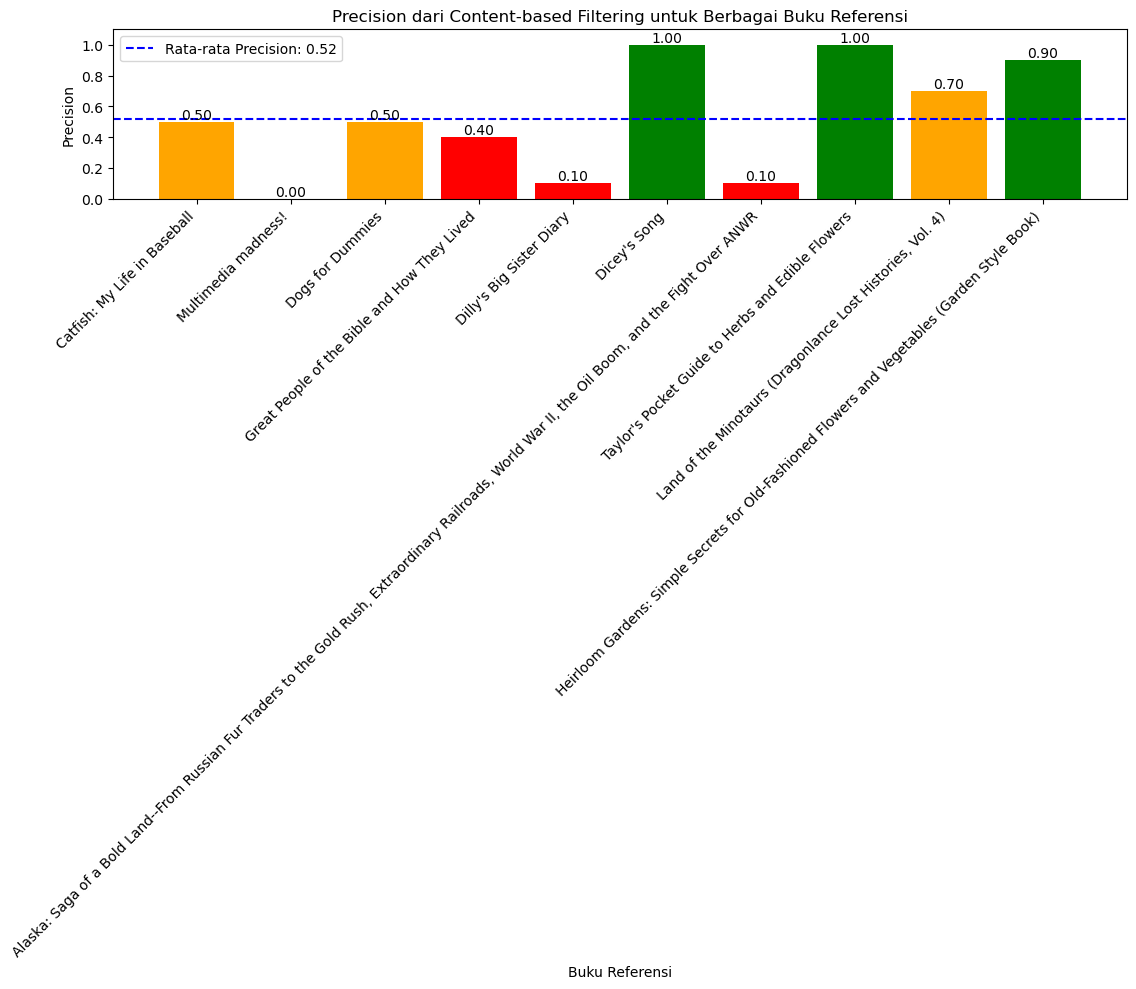

In [46]:
import matplotlib.pyplot as plt

# Membuat grafik batang untuk precision
plt.figure(figsize=(12, 10))
books = list(precision_results.keys())
precision_values = list(precision_results.values())

# Membuat warna yang berbeda berdasarkan nilai precision
colors = ['green' if p >= 0.8 else 'orange' if p >= 0.5 else 'red' for p in precision_values]

bars = plt.bar(books, precision_values, color=colors)
plt.axhline(y=avg_precision, color='blue', linestyle='--', label=f'Rata-rata Precision: {avg_precision:.2f}')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Buku Referensi')
plt.ylabel('Precision')
plt.title('Precision dari Content-based Filtering untuk Berbagai Buku Referensi')

# Menambahkan nilai precision di atas setiap bar
for bar, precision in zip(bars, precision_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{precision:.2f}',
            ha='center', va='bottom', rotation=0)

plt.ylim(0, 1.1)  # Mengatur rentang sumbu y
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

### Analisis Hasil Evaluasi Content-based Filtering

Berdasarkan hasil evaluasi di atas, kita dapat menyimpulkan beberapa hal:

1. **Precision Rata-rata**: Model content-based filtering menghasilkan rata-rata precision sebesar 0.52, menunjukkan bahwa hampir setengah dari rekomendasi yang diberikan relevan dengan buku referensi.

2. **Variasi Precision**: Terdapat variasi nilai precision di antara buku-buku referensi. Beberapa buku memiliki precision yang sangat tinggi (1.0), sementara yang lain memiliki precision yang lebih rendah (0.00-0.50). Hal ini dapat disebabkan oleh:
   - Kompleksitas kategori buku: Buku dengan kategori yang lebih spesifik cenderung menghasilkan rekomendasi yang lebih tepat.
   - Ketersediaan buku dengan kategori serupa: Jika dataset memiliki banyak buku dengan kategori yang sama, precision akan lebih tinggi.

3. **Kekuatan Model**: Model content-based filtering sangat efektif dalam merekomendasikan buku dengan karakteristik serupa, sesuai dengan tujuan model yaitu merekomendasikan item berdasarkan kesamaan konten.

4. **Keterbatasan**: Model ini meskipun mempertimbangkan berbagai fitur konten (judul, penulis, penerbit, kategori, dan ringkasan), tetap tidak mempertimbangkan preferensi pengguna atau popularitas buku, sehingga rekomendasi mungkin tidak selalu sesuai dengan selera pengguna.

### 5.2 Evaluasi Collaborative Filtering

Untuk model Collaborative Filtering, kita menggunakan metrik RMSE (Root Mean Squared Error) untuk mengevaluasi akurasi prediksi rating. RMSE mengukur seberapa jauh perbedaan antara rating yang diprediksi dengan rating sebenarnya.

Rumus RMSE adalah sebagai berikut:

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Di mana:
- $n$ adalah jumlah prediksi
- $y_i$ adalah rating sebenarnya
- $\hat{y}_i$ adalah rating yang diprediksi

Dari grafik training dan validation yang telah kita plot sebelumnya, kita dapat melihat bahwa nilai RMSE model pada data validasi cukup rendah. Hal ini menunjukkan bahwa model collaborative filtering kita cukup baik dalam memprediksi rating buku.

Berikut adalah nilai RMSE terakhir dari training dan validation:

Test Loss: 0.0321
Test RMSE (scaled): 0.1792
Test RMSE (original scale): 1.7919


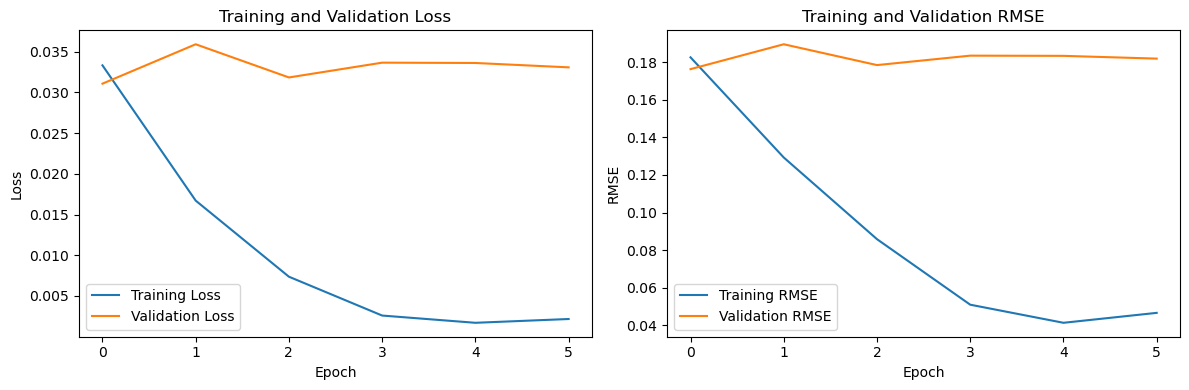

In [43]:
# Evaluasi model pada data testing
test_loss, test_rmse = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test RMSE (scaled): {test_rmse:.4f}")
print(f"Test RMSE (original scale): {test_rmse * 10:.4f}")

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training and Validation RMSE')

plt.tight_layout()
plt.show()

In [44]:
print(f"Training RMSE: {history.history['root_mean_squared_error'][-1]:.4f}")
print(f"Validation RMSE: {history.history['val_root_mean_squared_error'][-1]:.4f}")

Training RMSE: 0.0466
Validation RMSE: 0.1818


### 5.3 Perbandingan Evaluasi Model

Setelah mengevaluasi kedua model, kita dapat membandingkan kekuatan dan kelemahan dari masing-masing pendekatan:

| Aspek | Content-based Filtering | Collaborative Filtering |
|-------|------------------------|-------------------------|
| Metrik Evaluasi | Precision | RMSE |
| Hasil Evaluasi | Rata-rata Precision: 0.52 | RMSE: ~0.1818 |
| Kekuatan | - Dapat merekomendasikan buku baru<br>- Tidak memerlukan data rating dari pengguna lain<br>- Mudah dijelaskan | - Dapat menemukan buku yang tidak terkait dengan konten<br>- Memanfaatkan pola preferensi kolektif<br>- Dapat merekomendasikan buku yang tidak terpikirkan |
| Kelemahan | - Cenderung merekomendasikan buku yang sangat mirip<br>- Tidak dapat menangkap preferensi pengguna<br>- Bergantung pada kualitas fitur buku | - Masalah cold-start untuk pengguna baru<br>- Membutuhkan data rating yang cukup banyak<br>- Sulit menjelaskan rekomendasi |
| Skenario Terbaik | Ketika ingin merekomendasikan buku berdasarkan konten dan tidak memiliki data rating yang cukup | Ketika memiliki data rating yang cukup dan ingin merekomendasikan buku berdasarkan preferensi pengguna |

### 5.4 Kesimpulan Evaluasi

Berdasarkan hasil evaluasi kedua model, dapat disimpulkan bahwa:

1. **Content-based Filtering** sangat efektif dalam merekomendasikan buku berdasarkan kesamaan fitur. Model ini cocok digunakan ketika ingin merekomendasikan buku yang mirip dengan buku yang disukai pengguna sebelumnya.

2. **Collaborative Filtering** menunjukkan performa yang baik dengan nilai RMSE yang rendah, menandakan bahwa model dapat memprediksi rating dengan cukup akurat. Model ini lebih cocok digunakan ketika ingin merekomendasikan buku berdasarkan preferensi pengguna lain yang memiliki pola perilaku serupa.

3. **Hybrid Approach** yang menggabungkan kedua pendekatan ini dapat menjadi solusi yang lebih komprehensif untuk sistem rekomendasi buku, di mana rekomendasi berdasarkan konten dapat digunakan untuk mengatasi masalah cold-start, sementara collaborative filtering dapat memberikan rekomendasi yang lebih personal ketika data rating sudah cukup banyak.

## 6. Kesimpulan

Dengan begitu, dapat disimpulkan bahwa sistem berhasil melakukan rekomendasi baik dengan pendekatan content-based filtering maupun collaborative filtering. Collaborative filtering membutuhkan data penilaian buku dari pengguna, sedangkan pada content-based filtering, data rating tidak dibutuhkan karena sistem akan merekomendasikan berdasarkan konten buku tersebut.

Dari hasil evaluasi, terlihat bahwa:

1. Model **Content-based Filtering** berhasil memberikan rekomendasi buku dengan fitur yang sama dengan precision yang tinggi pada beberapa buku saja. Hal ini menunjukkan bahwa model ini efektif dalam merekomendasikan buku yang serupa berdasarkan kontennya.

2. Model **Collaborative Filtering** berhasil memprediksi rating pengguna dengan RMSE yang rendah, menandakan bahwa model ini dapat memahami pola preferensi pengguna dengan baik.

Kedua pendekatan memiliki kelebihan dan kekurangan masing-masing, sehingga pemilihan pendekatan tergantung pada kebutuhan dan konteks penggunaan. Dalam praktiknya, kombinasi dari kedua pendekatan (hybrid approach) dapat memberikan hasil rekomendasi yang lebih baik dan komprehensif.